# Laboratorium 1


### Konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js
import random

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        plt.close()
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


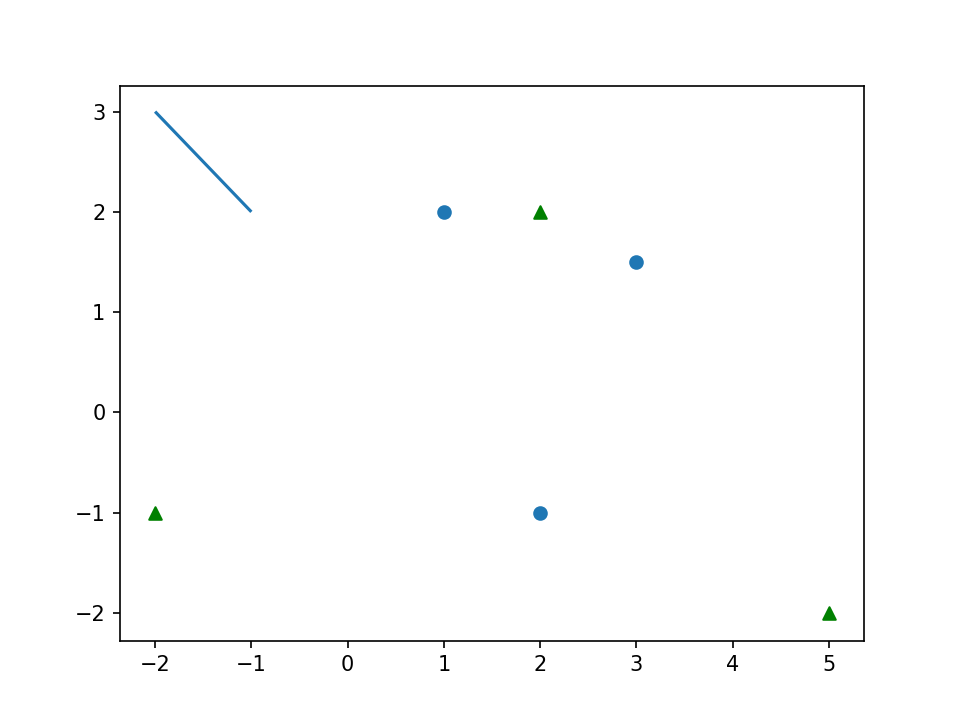

In [3]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Rozwiązanie

### Zadanie 1

In [4]:
%matplotlib notebook

points1 = PointsCollection([(random.uniform(-1000, 1000), random.uniform(-1000, 1000))
                               for i in range(10**5)], color = 'blue', marker = '^')

points2 = PointsCollection([(random.uniform(-10**14, 10**14), random.uniform(-10**14, 10**14))
                               for i in range(10**5)], color = 'cyan', marker = '.')

R = 100
random_fi = [random.uniform(0, 2*np.pi) for i in range(1000)]
    
points3 = PointsCollection([(10*np.cos(t), 10*np.sin(t)) for t in random_fi])
#points3 = PointsCollection([(R*np.cos(t),R*np.sin(t))
                            #for t in random_fi], color = 'red', marker = 's')

p0 = (-1.0, 0.0)
v = (2.0, 0.1)
random_t = [random.uniform(-499.5, 499.5) for i in range(1000)]

points4 = PointsCollection([(p0[0]+v[0]*t,p0[1]+v[1]*t)
                            for t in random_t], color = 'yellow', marker = '+')


### Zadanie 2a

<IPython.core.display.Javascript object>


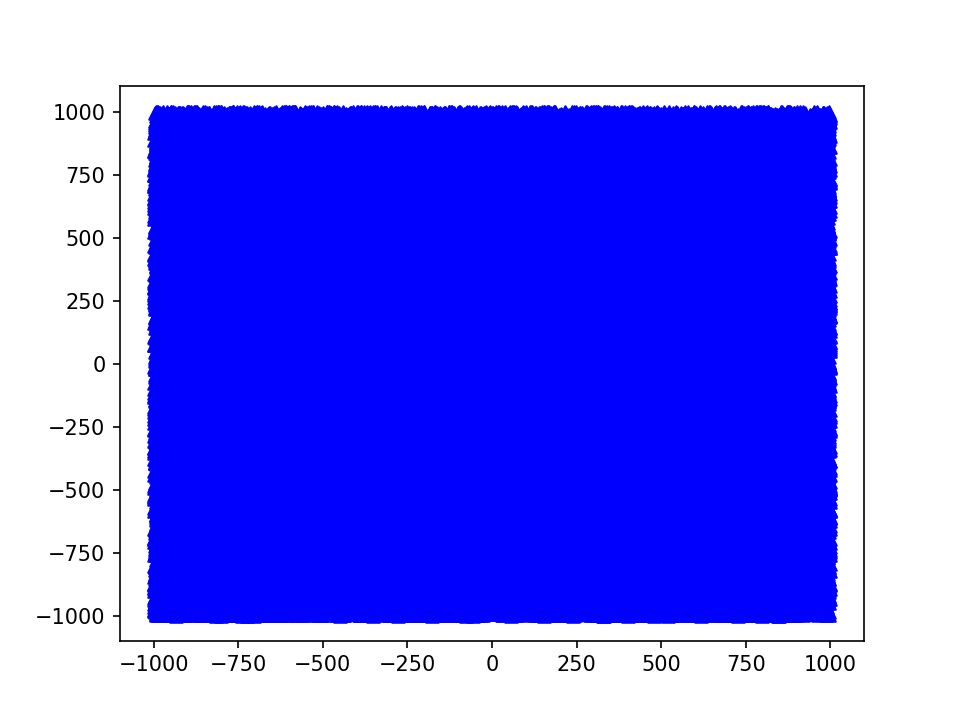

In [5]:
%matplotlib notebook

plot1 = Plot([points1])

plot1.draw()

### Zadanie 2b

<IPython.core.display.Javascript object>


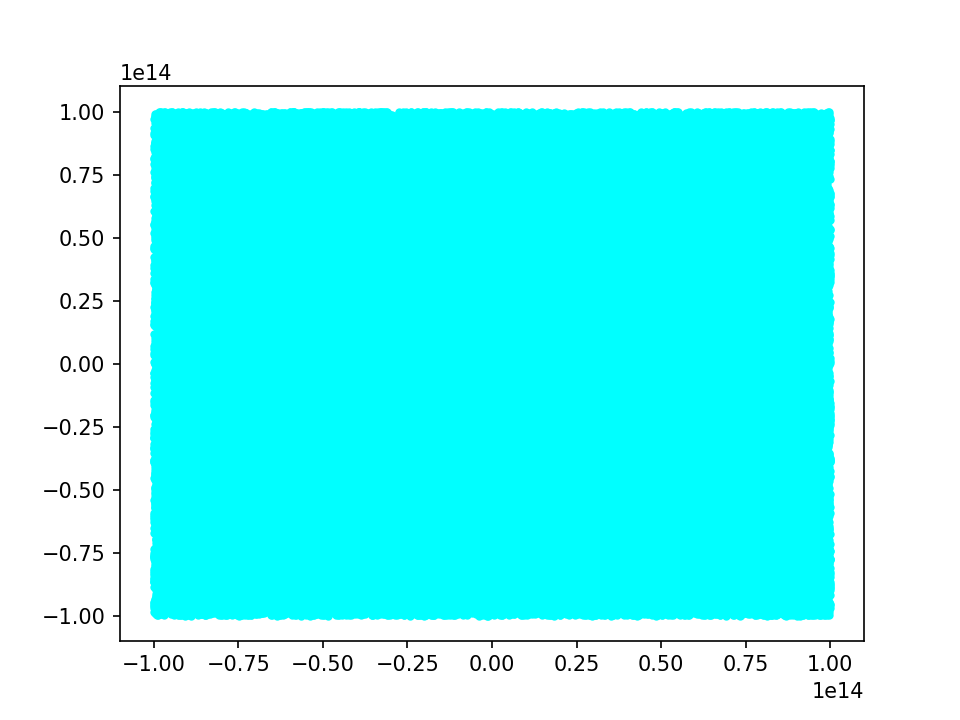

In [6]:
%matplotlib notebook

plot2 = Plot([points2])
plot2.draw()

### Zadanie 2c

<IPython.core.display.Javascript object>


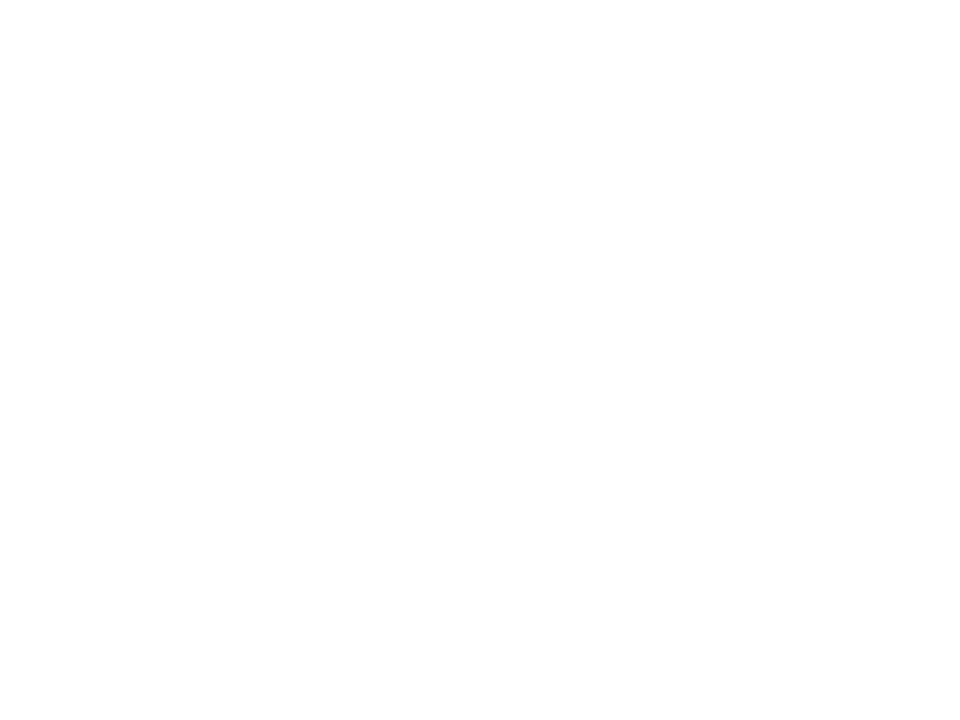

In [7]:
%matplotlib notebook

plot3 = Plot([points3])
plot3.draw()

### Zadanie 2d

<IPython.core.display.Javascript object>


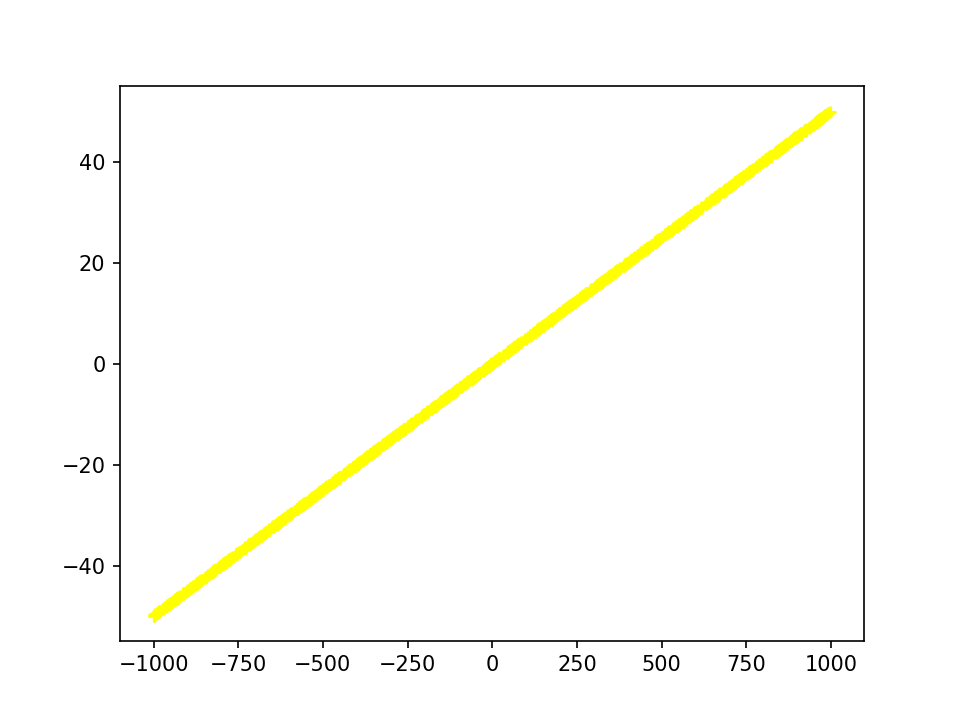

In [8]:
%matplotlib notebook

plot4 = Plot([points4])
plot4.draw()

### Zadanie 3

In [9]:
%matplotlib notebook

epsilon = 10**(-6)

def position_of_point_towards_line(matrix, do_print):
    determinant = np.linalg.det(matrix)
        
    if determinant > epsilon:
        return 1
    elif determinant < (-1)*epsilon:
        return -1
    else:
        return 0
    

sets_of_points = [points1, points2, points3, points4]

a = (-1.0, 0.0)
b = (1.0, 0.1)

### Zadanie 3.1

In [10]:
%matplotlib notebook
# det < 0 -> prawa strona, det > 0 -> lewa strona od prostej

base_matrix1 = [[a[0], a[1], 1.0],[b[0], b[1], 1.0],[0.0, 0.0, 1.0]]
first_conclusion = [[] for i in range(4)]
index = 0

for set_of_points in sets_of_points:
    for point in set_of_points.points:
        base_matrix1[2][0] = point[0]
        base_matrix1[2][1] = point[1]
        position = position_of_point_towards_line(base_matrix1, 0)
        first_conclusion[index].append(position)
    index+=1
    
#print(first_conclusion[3])


### Zadanie 3.2

In [11]:
%matplotlib notebook

second_conclusion = [[] for i in range(4)]
base_matrix2 = [[a[0],a[1]],[b[0],b[1]]]
index = 0

for set_of_points in sets_of_points:
    for point in set_of_points.points:
        #if index == 3:
            #print(point)
        base_matrix2[0][0] -= point[0]
        base_matrix2[0][1] -= point[1]
        base_matrix2[1][0] -= point[0]
        base_matrix2[1][1] -= point[1]
        #if index == 3:
            #print(base_matrix2)
        position = position_of_point_towards_line(base_matrix2, index)
        second_conclusion[index].append(position)
        base_matrix2[0][0] = a[0]
        base_matrix2[0][1] = a[1]
        base_matrix2[1][0] = b[0]
        base_matrix2[1][1] = b[1]
        #if index == 3:
            #print(base_matrix2)
    index+=1
        
#print(second_conclusion[3])

### Zadanie 4

In [12]:
%matplotlib notebook

mistaken_orientations = [0 for i in range(4)]
differences_in_orientation = [[] for i in range(4)]
index = 0

for first, second in zip(first_conclusion, second_conclusion):
    for first_orientation, second_orientation in zip(first, second):
        if first_orientation == second_orientation:
            is_orientation_the_same = 1
        else:
            is_orientation_the_same = 0
            mistaken_orientations[index] += 1
            
        differences_in_orientation[index].append(is_orientation_the_same)
        #print(first_orientation, second_orientation)
    index += 1


### Zadanie 4.1

<IPython.core.display.Javascript object>


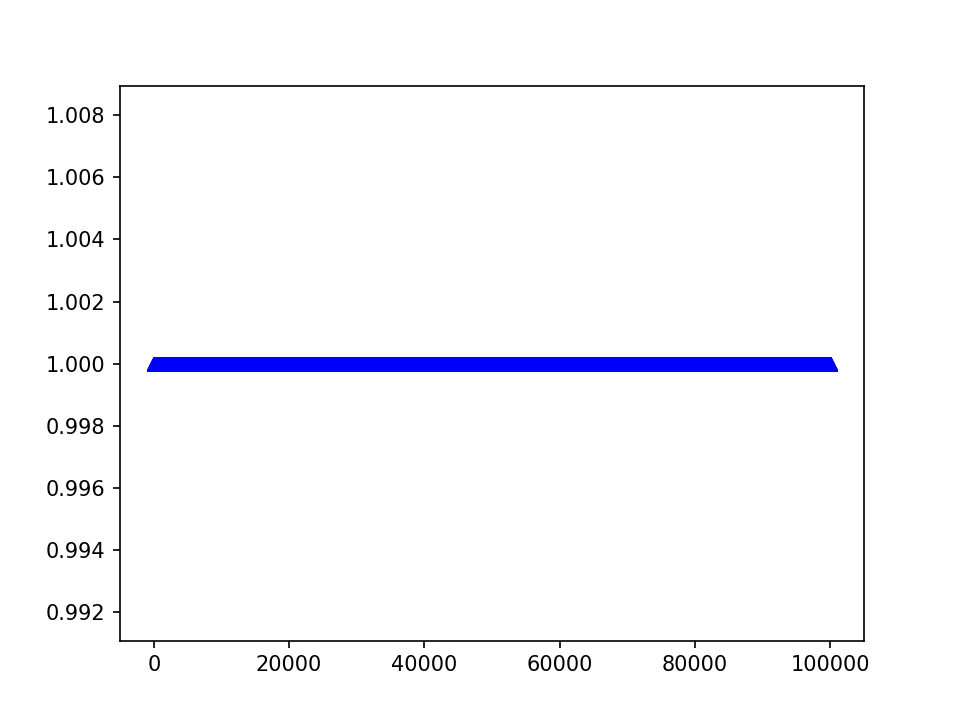

Ilość punktów w pierwszym zbiorze, których orientacja względem prostej została inaczej określona:  0


In [17]:
%matplotlib notebook

points1 = PointsCollection([(x, differences_in_orientation[0][x])
                               for x in range(10**5)], color = 'blue', marker = '^')

plot1 = Plot([points1])

plot1.draw()

print('Ilość punktów w pierwszym zbiorze, których orientacja względem prostej została inaczej określona: ', mistaken_orientations[0])

### Zadanie 4.2

<IPython.core.display.Javascript object>


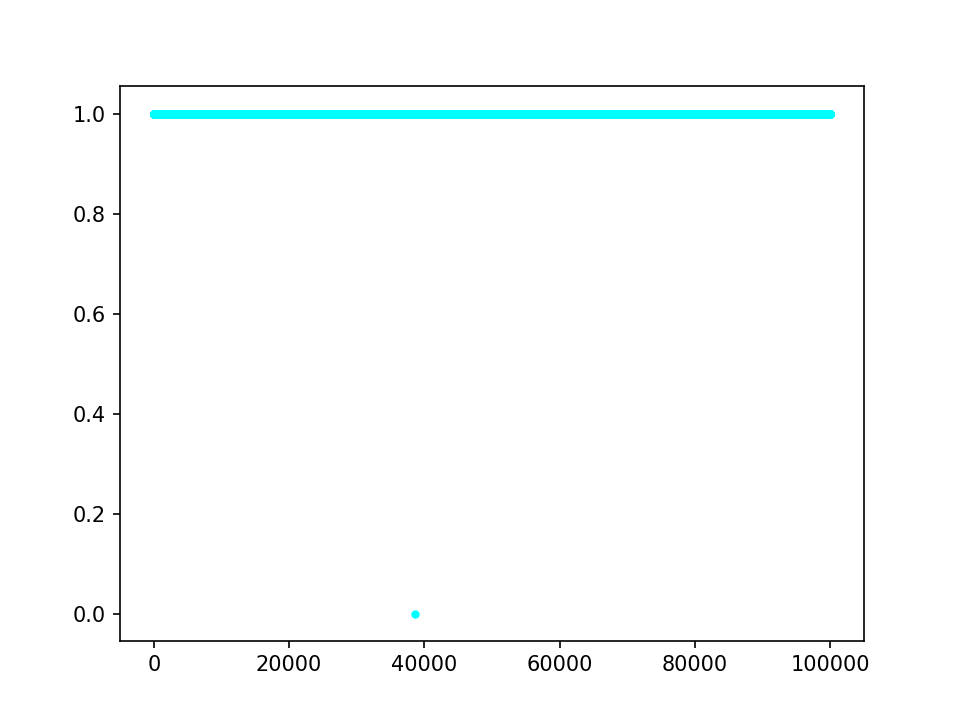

Ilość punktów w drugim zbiorze, których orientacja względem prostej została inaczej określana:  1


In [18]:
%matplotlib notebook

points2 = PointsCollection([(x, differences_in_orientation[1][x])
                               for x in range(10**5)], color = 'cyan', marker = '.')

plot2 = Plot([points2])

plot2.draw()

print('Ilość punktów w drugim zbiorze, których orientacja względem prostej została inaczej określana: ', mistaken_orientations[1])

### Zadanie 4.3

<IPython.core.display.Javascript object>


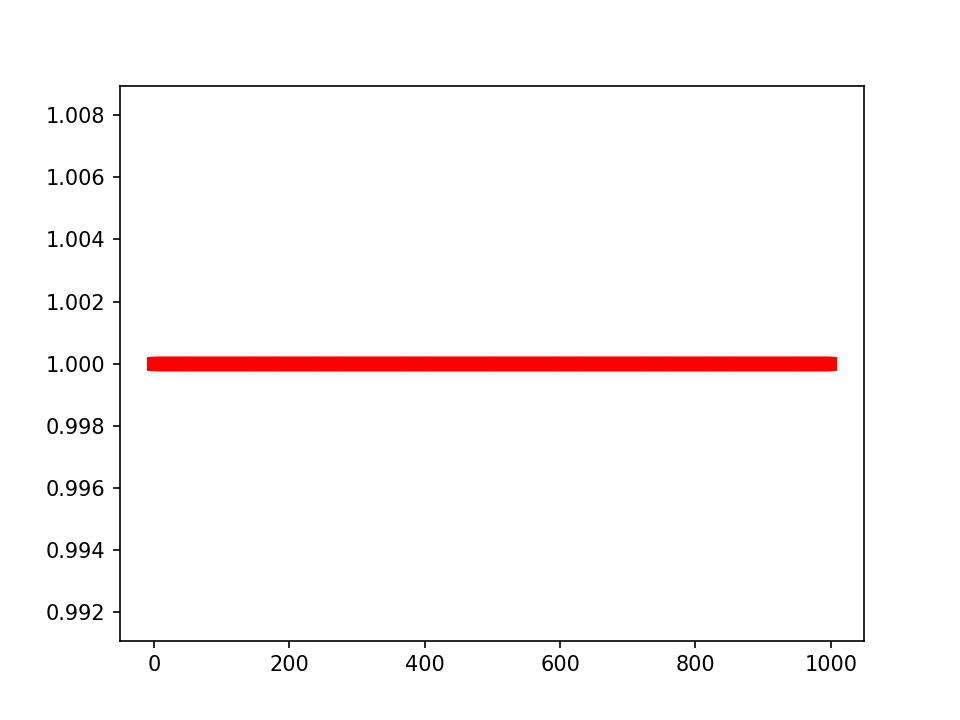

Ilość punktów w trzecim zbiorze, których orientacja względem prostej została inaczej określana:  0


In [19]:
%matplotlib notebook

points3 = PointsCollection([(x, differences_in_orientation[2][x])
                               for x in range(1000)], color = 'red', marker = 's')

plot3 = Plot([points3])

plot3.draw()

print('Ilość punktów w trzecim zbiorze, których orientacja względem prostej została inaczej określana: ', mistaken_orientations[2])

### Zadanie 4.4

<IPython.core.display.Javascript object>


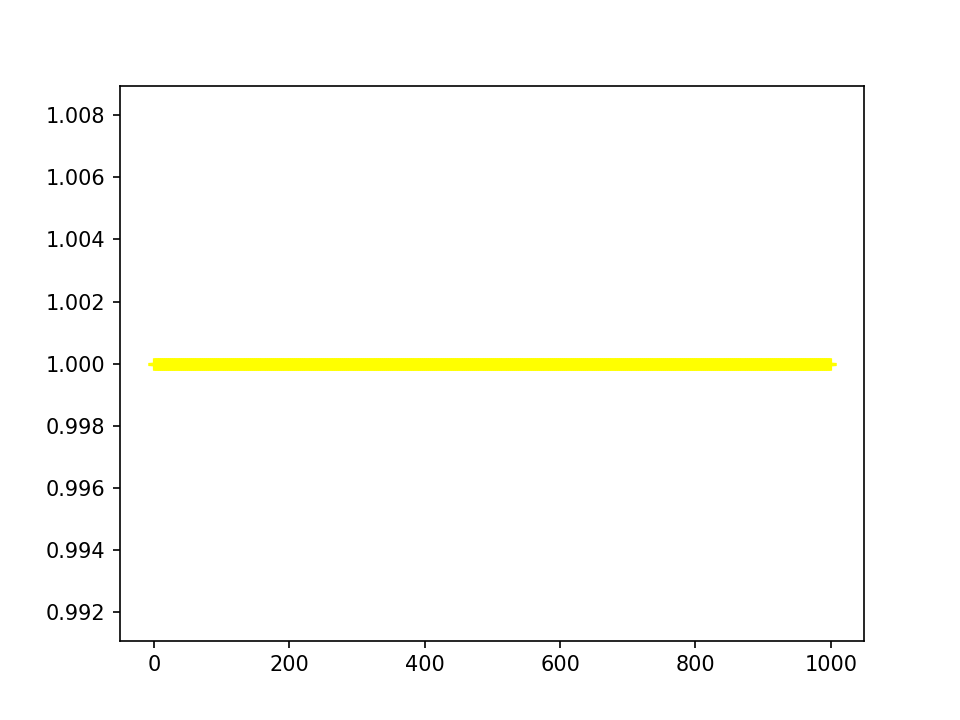

Ilość punktów w czwartym zbiorze, których orientacja względem prostej została inaczej określana:  0


In [16]:
%matplotlib notebook

points4 = PointsCollection([(x, differences_in_orientation[3][x])
                               for x in range(1000)], color = 'yellow', marker = '+')

plot4 = Plot([points4])

plot4.draw()

print('Ilość punktów w czwartym zbiorze, których orientacja względem prostej została inaczej określana: ', mistaken_orientations[3])